## Задача 2.1.  Методом простой итерации найти вещественные корни алгебраического уравнения P(x) = 0 с точностью $\varepsilon = 10^{-8}$

### Функция 
$$f(x) = e^{-x} - lg(1 - x^{2})- 2$$

### 1. Графики функции и производной

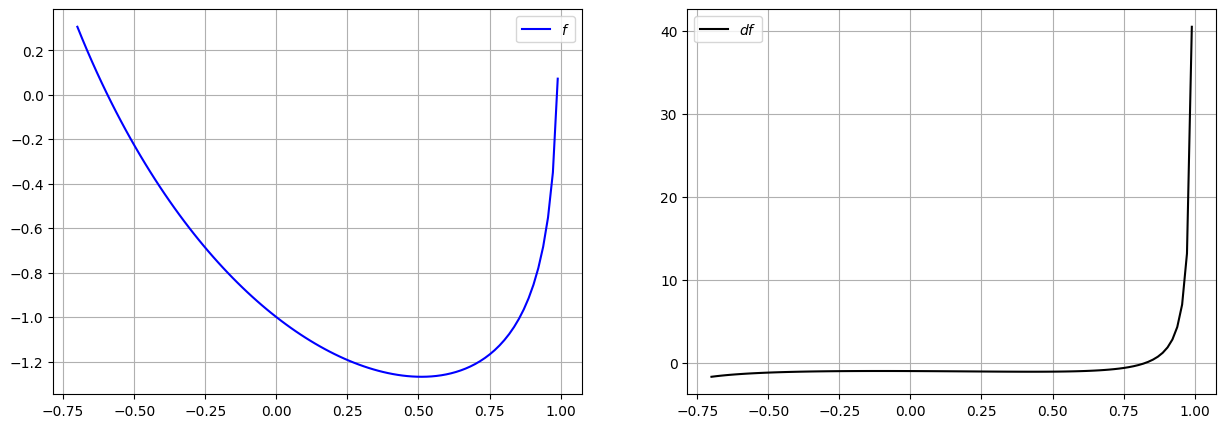

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

eps = 10**(-8)

def f(x):
    return np.exp(-x) - np.log10(1 - x**2) - 2

def df(x): 
    return (-1/np.exp(-x)) + 2*x / (np.log(10)*(1 - x**2))

A = -0.7
B = 0.99
n = 100

x = np.linspace(A, B, n, endpoint=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x, f(x), label='$f$', color="blue")
axs[1].plot(x, df(x), label='$df$', color="black")
axs[0].grid(True)
axs[1].grid(True)
axs[0].legend()
axs[1].legend()
plt.show()


### 2. Отрезки локализации корней: 
$$x_{1}\in [-0.6, -0.55]$$
$$x_{2}\in [0.9, 0.99]$$

#### Проверим, что на концах отрезков локализации производная функции сохраняет знак:

In [17]:
x = [[-0.8, -0.4], [0.9, 0.99]]
f = [[f(d[0]), f(d[1])] for d in x]
for i in f: 
    print(i)

[0.6692384277251806, -0.43245458842061124]
[-0.8721839412122296, 0.07272361461233867]


In [18]:

x = [[-0.8, -0.4], [0.9, 0.99]]
df = [[df(d[0]), df(d[1])] for d in x]
for i in df: 
    print(i)

[-2.3795266614650084, -1.0839338383244506]
[1.654765664768595, 40.51997528485864]


### 3. Для каждого корня определить итерационный параметр и параметр,используя  формулы:
$$\alpha = \frac{2}{M1 + m1}$$

$$ M1 = max P'(x) |_{[a,b]} $$
$$ m1 = min P'(x) |_{[a,b]} $$
$$ q = |\frac{M1-m1}{M1+m1}| $$


In [21]:
a1 = -0.8
b1 = -0.4
a2 = 0.9
b2 = 0.99

fM = [df(b1), df(b2)]
fm = [df(a1), df(a2)]

a = [0,0]
q = [0,0]

for i in range(2):
    a[i] = (2/(fm[i] + fM[i]))
    q[i] = abs((fm[i] - fM[i])/(fm[i] + fM[i]))
    print (i + 1, 'корень')
    print ("M:", fM[i])
    print ("m:", fm[i])
    print ("Параметр a:", a[i])
    print ("Параметр q:", q[i])
    print ()

1 корень
M: -1.0839338383244506
m: -2.3795266614650084
Параметр a: -0.5774571415269724
Параметр q: 0.37407466411680335

2 корень
M: 40.51997528485864
m: 1.654765664768595
Параметр a: 0.04742174948718155
Параметр q: 0.9215281171853542



In [24]:
def middle(a,b):
    return (a+b)/2

eps = 10**(-8)

x0 = [middle(a1,b1), middle(a2,b2)]

it = [0, 0]

def mpi(x0, a, q):
    it = 0
    x = x0 - a * f(x0)
    while (abs(x - x0) >= ((1-q)/q * eps)) :
        x0 = x
        x = x0 - a * f(x0)
        it += 1
    return (it, x0)

it[0], x0[0] = mpi(x0[0], a[0], q[0])
print("Первый корень:", x0[0], "; Итерации:", it[0])

it[1], x0[1] = mpi(x0[1], a[1], q[1])
print("Второй корень:", x0[1], ": Итерации:", it[1])


Первый корень: -0.5939216147419027 ; Итерации: 20
Второй корень: 0.9881473023813185 : Итерации: 47


| Корни: | [a,b] | M1 | m1 | $\alpha$ | q | Корень с заданной точностью | Число итераций |
| ---| --- | --- | --- | --- | --- | --- | --- | 
|1 корень: | [-0.8, -0.4]  | -1.0839338383244506 | -2.3795266614650084 | -0.5774571415269724 | 0.37407466411680335 | -0.5939216147419027 | 20 |
|2 корень: | [0.9, 0.99] | 40.51997528485864 | 1.654765664768595 | 0.04742174948718155 | 0.9215281171853542 | 0.9881473023813185 | 47 |

## Задача 2.2.  Дано уравнение   Найти все  корни уравнения с заданной точностью   на указанном отрезке [a,b] методом Ньютона и методом бисекции.

### Функция
$$f(x) = x^{3} * sin(5x) + cos(5x)$$

#### Отрезок
$$[-2, 2]$$

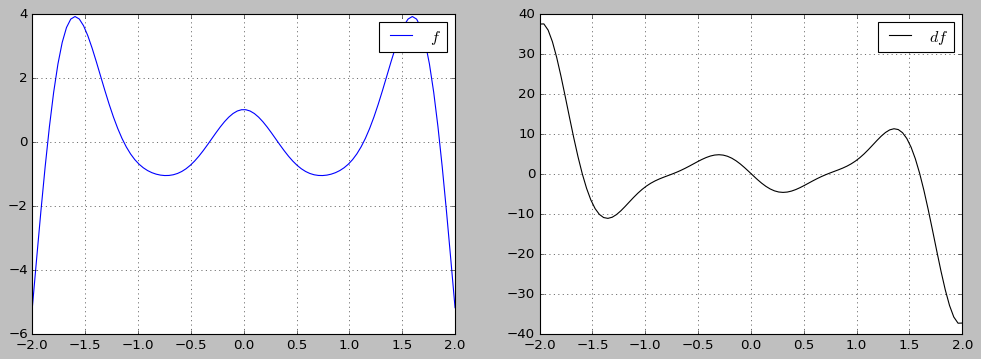

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import math

eps = 10**(-8)

def f(x):
    return (x**3) * np.sin(5*x) + np.cos(5*x)

def df(x):
    return 3 * (x**2) * np.sin(5*x) + 5 * (x**3) * np.cos(5*x) - 5 * np.sin(5*x)

A = -2
B = 2
n = 100

x = np.linspace(A, B, n, endpoint=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x, f(x), label='$f$', color="blue")
axs[1].plot(x, df(x), label='$df$', color="black")
axs[0].grid(True)
axs[1].grid(True)
axs[0].legend()
axs[1].legend()
plt.show()


### 2. Отрезки локализации корней: 
$$x_{1}\in [-2, -1.8]$$
$$x_{2}\in [-1.2, -1]$$
$$x_{3}\in [-0.5, -0.2]$$
$$x_{4}\in [0.2, 0.5]$$
$$x_{5}\in [1, 1.2]$$
$$x_{6}\in [1.8, 2]$$

#### Проверим, что на концах отрезков локализации производная функции сохраняет знак:

In [43]:
x = [[-2, -1.8],[-1.2, -1],[-0.5, -0.2],[0.2, 0.5],[1, 1.2],[1.8, 2]]
df = [[df(d[0]), df(d[1])] for d in x]
for i in df: 
    print(i)

[37.37100893928368, 24.62335918621609]
[-8.48587381543443, -3.3361594766424085]
[3.044221372158648, 4.084766313627809]
[-4.084766313627809, -3.044221372158648]
[3.3361594766424085, 8.48587381543443]
[-24.62335918621609, -37.37100893928368]


In [47]:
def New(f, df, x0, eps):
    xn = x0
    xn_1 = xn - f(xn) / df(xn) 
    k=1
    while abs(xn - xn_1) >= eps:
        xn = xn_1
        xn_1 = xn - f(xn) / df(xn)
        k += 1
    return xn, k - 1


eps= 10**(-12)

a1 = -2
b1 = -1.8
res1 = (New(f, df, (a1 + b1)/2 , eps)) 
print("Первый корень: ",res1[0], "итерации: ", res1[1])

a2= -1.2
b2 = -1
res2 = (New(f, df, (a2 + b2)/2 , eps)) 
print("Второй корень: ",res2[0], "итерации: ", res2[1])

a3 = -0.5
b3 = -0.2
res1 = (New(f, df, (a3 + b3)/2 , eps)) 
print("Третий корень: ",res1[0], "итерации: ", res1[1])

a4 = 0.2
b4 = 0
res2 = (New(f, df, (a4 + b4)/2 , eps)) 
print("Четвертый корень: ",res2[0], "итерации: ", res2[1])

a5 = 1
b5 = 1.2
res1 = (New(f, df, (a5 + b5)/2 , eps)) 
print("Пятый корень: ",res1[0], "итерации: ", res1[1])

a6 = 1.8
b6 = 2
res2 = (New(f, df, (a6 + b6)/2 , eps)) 
print("Шестой корень: ",res2[0], "итерации: ", res2[1])


Первый корень:  -1.8538169024441482 итерации:  4
Второй корень:  -1.1372078154349676 итерации:  4
Третий корень:  -0.32075709706096667 итерации:  3
Четвертый корень:  0.3207570970609668 итерации:  5
Пятый корень:  1.1372078154349676 итерации:  4
Шестой корень:  1.8538169024441482 итерации:  4


In [48]:
def bisMethod(f, a, b, epsil):
    y1 = f(a)
    y2 = f(b)
    s = f(b) - f(a)
    k = 1
    r = b - a
    while r > epsil:
        c = a + (b - a)/2
        y = f(c)
        if y == 0:
            return c
        if y * s > 0:
            b = c
        else:
            a = c
        r = b - a
        k += 1
    return b, k - 1

a1 = -2
b1 = -1.8
res1 = (bisMethod(f, a1, b1, eps)) 
print("Первый корень: ",res1[0], "итерации: ", res1[1])

a2= -1.2
b2 = -1
res2 = (bisMethod(f, a2, b2, eps)) 
print("Второй корень: ",res2[0], "итерации: ", res2[1])

a3 = -0.5
b3 = -0.2
res3 = (bisMethod(f, a3, b3, eps)) 
print("Третий корень: ",res3[0], "итерации: ", res1[1])

a4 = 0.2
b4 = 0.5
res4 = (bisMethod(f, a4, b4, eps)) 
print("Четвертый корень: ",res4[0], "итерации: ", res2[1])

a5 = 1
b5 = 1.2
res5 = (bisMethod(f, a5, b5, eps)) 
print("Пятый корень: ",res5[0], "итерации: ", res1[1])

a6 = 1.8
b6 = 2
res6 = (bisMethod(f, a6, b6, eps)) 
print("Шестой корень: ",res6[0], "итерации: ", res2[1])

Первый корень:  -1.8538169024439415 итерации:  38
Второй корень:  -1.1372078154345218 итерации:  38
Третий корень:  -0.32075709706059574 итерации:  38
Четвертый корень:  0.3207570970611414 итерации:  38
Пятый корень:  1.1372078154352494 итерации:  38
Шестой корень:  1.8538169024446691 итерации:  38


Расчетная формула метода Ньютона: $$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}$$
Метод бисекции: $$c = a + \frac{b - a}{2}$$
                                                                            
| Начальное приближение | Корень уравнения методом Ньютона | Корень уравнения методом бисекции | Число итераций метода Ньютона | Число итераций метода бисекции |
| --- | --- | --- | --- |  ---|
| -2 | -1.8538169024441482 | -1.8538169024439415 |4 | 38 |   
| -1.2 | -1.1372078154349676 | -1.1372078154345218 | 4 | 38 |
| -0.5  | -0.32075709706096667 | -0.32075709706059574 | 3 | 38 |
| 0.2 | 0.32075709706096667 | 0.3207570970611414 | 5 | 38 |   
| 1 | 1.1372078154349676 | 1.1372078154345218 | 4 | 38 |
| 1.8 | 1.8538169024441482 | 1.8538169024439415 | 4 | 38 |  
                                              

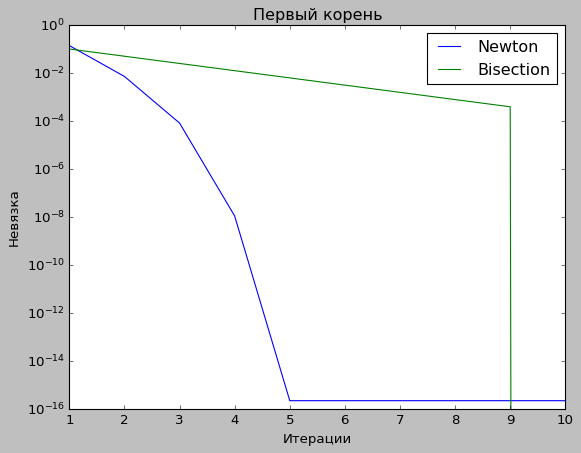

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def New_modified(f, df, x0, eps, max_iter):
    xn = x0
    xn_1 = xn - f(xn) / df(xn)
    residuals = [abs(xn - xn_1)]
    k = 1
    while k < max_iter:
        xn = xn_1
        xn_1 = xn - f(xn) / df(xn)
        residuals.append(abs(xn - xn_1))
        k += 1
    return np.array(residuals)

def bisMethod_modified(f, a, b, epsil, max_iter):
    y1 = f(a)
    y2 = f(b)
    s = f(b) - f(a)
    k = 1
    r = b - a
    residuals = []
    while k < max_iter:
        c = a + (b - a) / 2
        y = f(c)
        if y == 0:
            return c
        if y * s > 0:
            b = c
        else:
            a = c
        r = b - a
        residuals.append(r)
        k += 1
    # Дополнение массива нулями, если нужно
    while len(residuals) < max_iter:
        residuals.append(0)
    return np.array(residuals)


eps = 1e-8
max_iter = 10

x1 = -2

a1 = -2
b1 = -1.8

# Вызов модифицированных методов для получения массивов с модулями невязок
residuals_New = New_modified(f, df, x1, eps, max_iter)
residuals_bisMethod = bisMethod_modified(f, a1, b1, eps, max_iter)

# Построение графиков в логарифмической шкале
plt.figure()
plt.plot(np.arange(1, max_iter+1), residuals_New, label='Newton')
plt.plot(np.arange(1, max_iter+1), residuals_bisMethod, label='Bisection')
plt.xlabel('Итерации')
plt.ylabel('Невязка')
plt.yscale('log')
plt.legend()
plt.title('Первый корень')
plt.show()


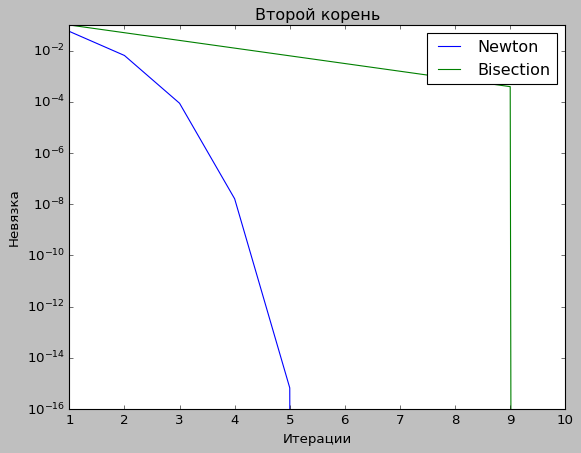

In [116]:
x2 = -1.2
a2 = -1.2
b2 = -1

# Вызов модифицированных методов для получения массивов с модулями невязок
residuals_New = New_modified(f, df, x2, eps, max_iter)
residuals_bisMethod = bisMethod_modified(f, a2, b2, eps, max_iter)

# Построение графиков в логарифмической шкале
plt.figure()
plt.plot(np.arange(1, max_iter+1), residuals_New, label='Newton')
plt.plot(np.arange(1, max_iter+1), residuals_bisMethod, label='Bisection')
plt.xlabel('Итерации')
plt.ylabel('Невязка')
plt.yscale('log')
plt.legend()
plt.title('Второй корень')
plt.show()

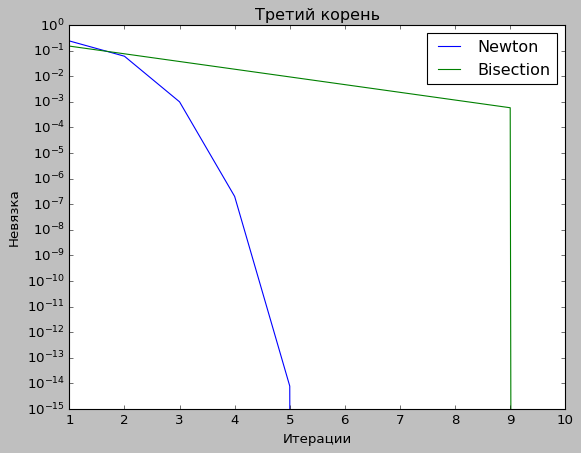

In [117]:
x3 = -0.5
a3 = -0.5
b3 = -0.2

# Вызов модифицированных методов для получения массивов с модулями невязок
residuals_New = New_modified(f, df, x3, eps, max_iter)
residuals_bisMethod = bisMethod_modified(f, a3, b3, eps, max_iter)

# Построение графиков в логарифмической шкале
plt.figure()
plt.plot(np.arange(1, max_iter+1), residuals_New, label='Newton')
plt.plot(np.arange(1, max_iter+1), residuals_bisMethod, label='Bisection')
plt.xlabel('Итерации')
plt.ylabel('Невязка')
plt.yscale('log')
plt.legend()
plt.title('Третий корень')
plt.show()

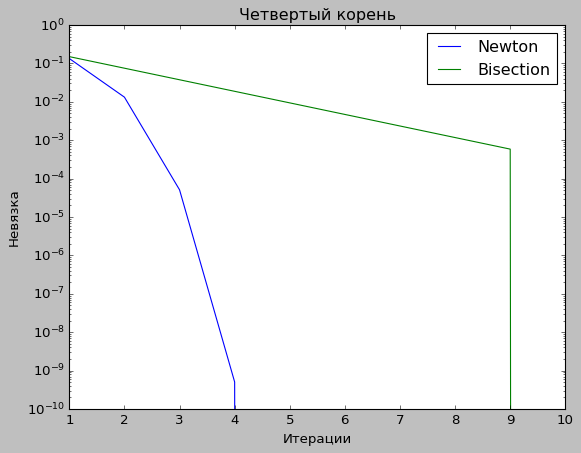

In [118]:
x4 = 0.2
a4 = 0.2
b4 = 0.5

# Вызов модифицированных методов для получения массивов с модулями невязок
residuals_New = New_modified(f, df, x4, eps, max_iter)
residuals_bisMethod = bisMethod_modified(f, a4, b4, eps, max_iter)

# Построение графиков в логарифмической шкале
plt.figure()
plt.plot(np.arange(1, max_iter+1), residuals_New, label='Newton')
plt.plot(np.arange(1, max_iter+1), residuals_bisMethod, label='Bisection')
plt.xlabel('Итерации')
plt.ylabel('Невязка')
plt.yscale('log')
plt.legend()
plt.title('Четвертый корень')
plt.show()

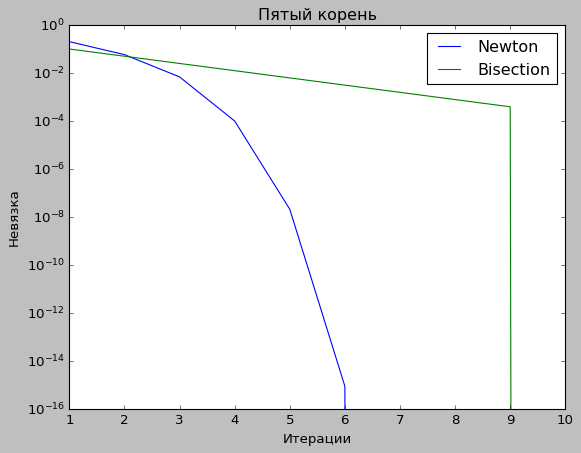

In [119]:
x5 = 1
a5 = 1
b5 = 1.2

# Вызов модифицированных методов для получения массивов с модулями невязок
residuals_New = New_modified(f, df, x5, eps, max_iter)
residuals_bisMethod = bisMethod_modified(f, a5, b5, eps, max_iter)

# Построение графиков в логарифмической шкале
plt.figure()
plt.plot(np.arange(1, max_iter+1), residuals_New, label='Newton')
plt.plot(np.arange(1, max_iter+1), residuals_bisMethod, label='Bisection')
plt.xlabel('Итерации')
plt.ylabel('Невязка')
plt.yscale('log')
plt.legend()
plt.title('Пятый корень')
plt.show()

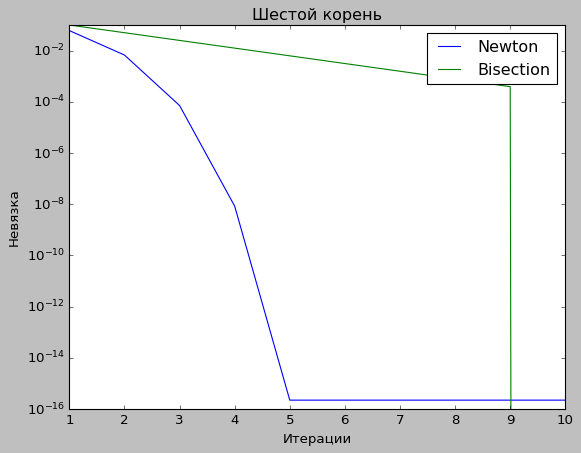

In [120]:
x6 = 1.8
a6 = 1.8
b6 = 2

# Вызов модифицированных методов для получения массивов с модулями невязок
residuals_New = New_modified(f, df, x6, eps, max_iter)
residuals_bisMethod = bisMethod_modified(f, a6, b6, eps, max_iter)

# Построение графиков в логарифмической шкале
plt.figure()
plt.plot(np.arange(1, max_iter+1), residuals_New, label='Newton')
plt.plot(np.arange(1, max_iter+1), residuals_bisMethod, label='Bisection')
plt.xlabel('Итерации')
plt.ylabel('Невязка')
plt.yscale('log')
plt.legend()
plt.title('Шестой корень')
plt.show()

1. Можно ли по полученным графикам определить порядок сходимости методов?

2. Как повлиял порядок сходимости метода на количество итераций в данных конкретных случаях? Соответствует ли это теоретическим результатам?

3. Будет ли на практике невязка стремиться к нулю? 

4. Возможно ли, что на некоторой итерации невязка будет равна нулю? 

1. Да, порядок сходимости метода Ньютона >1, а порядок сходимости метода бисекции 1.
2. Да, метод Ньютона, имеющий более высокий порядок сходимости, потребовал меньше итераций для достижения заданной точности по сравнению с методом бисекции. Это соответствует ожидаемым результатам, так как методы с более высоким порядком сходимости обычно сходятся быстрее.
3. Вблизи корня невязка будет колебаться вокруг нуля, поскольку точность вычислений ограничена погрешностями округления и другими факторами.
4. Да, на некоторой итерации невязка может быть равна нулю, особенно если метод приближается к решению. Однако из-за ограничений точности вычислений и приближений вероятность этого очень мала.

## Задача 2.3.  Используя метод Ньютона, найти все корни алгебраического уравнения $P_{m}$= 0 с точностью $\varepsilon = 10^{-8}$

### Функция
$$P_{m}(x) = 9.8x^{3} + 10x^{2} - 8.8x - 4.2$$

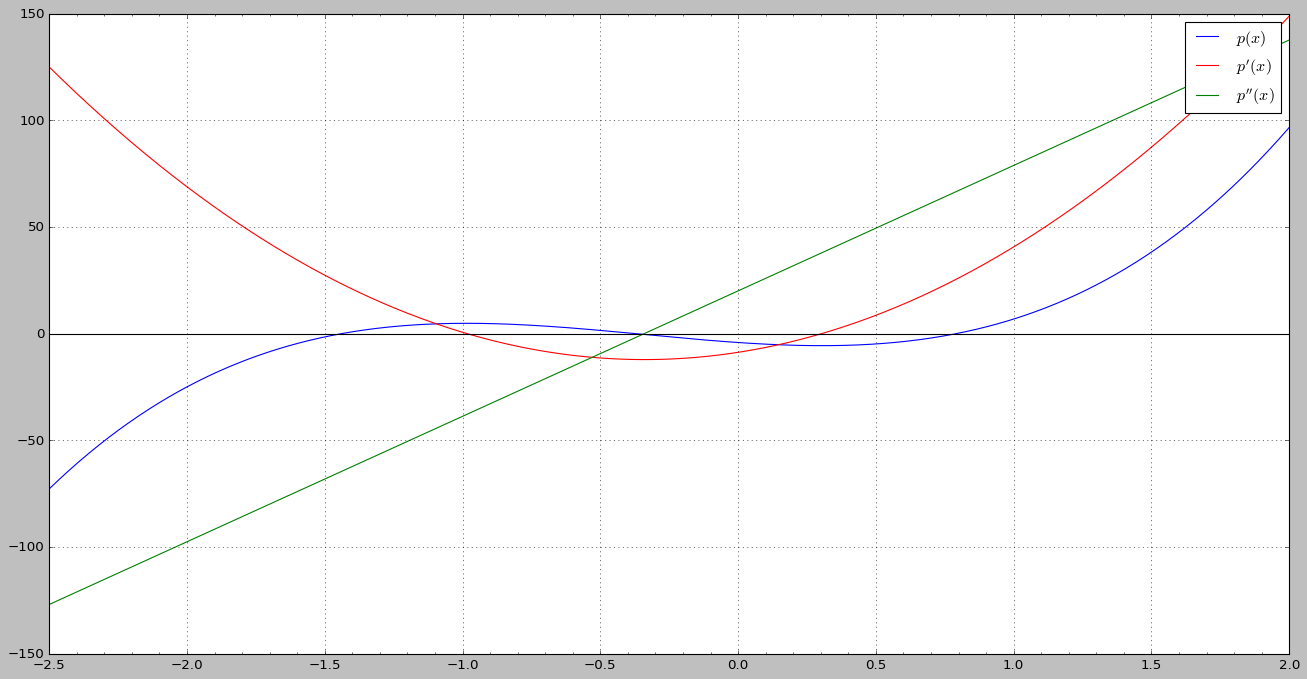

In [124]:
from matplotlib.ticker import MultipleLocator as ML
import numpy as np
import matplotlib.pyplot as plt

def p(x):
    return 9.8 * (x**3) + 10 * (x**2) - 8.8 * x - 4.2
def dp(x): 
    return 29.4 * (x**2) + 20 * x - 8.8
def ddp(x): 
    return 58.8 * x + 20

x = np.linspace(-2.5, 2, 1000)
fig, axs = plt.subplots(1, figsize=(20, 10))
plt.style.use("classic")

axs.plot(x, p(x), label='$p(x)$', color = "blue")
axs.plot(x, dp(x), label="$p'(x)$", color = "red")
axs.plot(x, ddp(x), label="$p''(x)$", color = "green")
axs.plot(x, 0*x, color = "black")

axs.xaxis.set_minor_locator(ML(0.1))

axs.grid()
axs.legend()
plt.show()

In [112]:
def newton_method(p, dp, x0, eps=1e-8, max_iterations=1000):
    x = x0
    k = 0
    for _ in range(max_iterations):
        fx = p(x)
        if abs(fx) < eps:
            return x, k
        fpx = dp(x)
        if fpx == 0:
            break
        x = x - fx / fpx
        k += 1
    return None, k

# Отрезки локализации для вещественных корней
intervals = [(-1.5, -1.3), (-0.5, -0.2), (0.5, 1)]


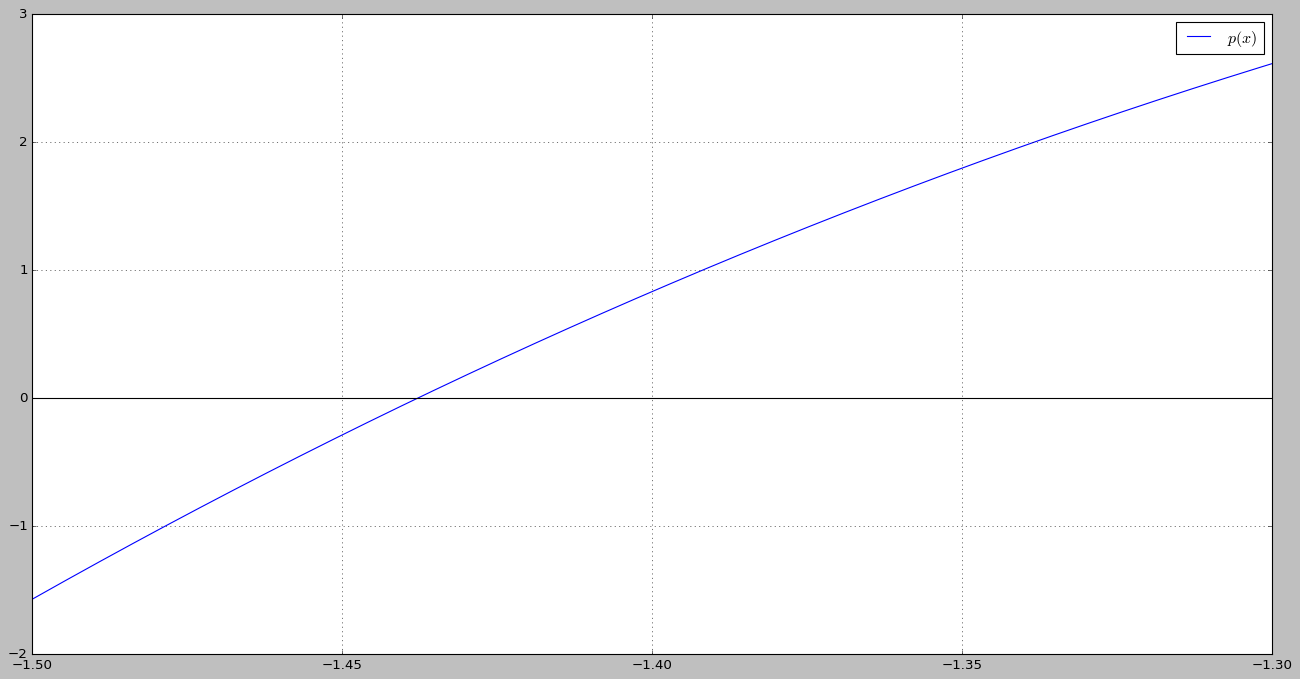

In [100]:
x = np.linspace(-1.5, -1.3, 1000)
fig, axs = plt.subplots(1, figsize=(20, 10))
plt.style.use("classic")

axs.plot(x, p(x), label='$p(x)$', color = "blue")
axs.plot(x, 0*x, color = "black")

axs.xaxis.set_minor_locator(ML(0.1))

axs.grid()
axs.legend()
plt.show()

In [107]:
interval1 = (-1.5, -1.3)
root1 = newton_method(p, dp, sum(interval1) / 2)
print(root1)

(-1.4376535919539615, 3)


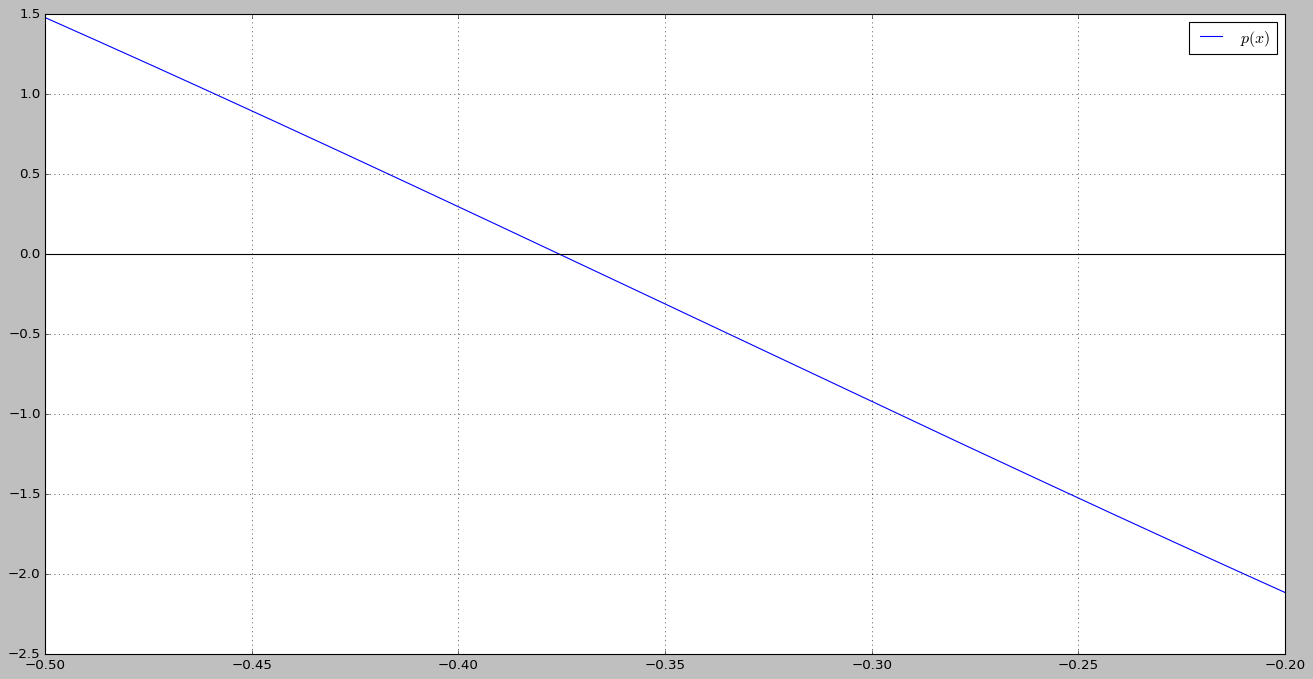

In [104]:
x = np.linspace(-0.5, -0.2, 1000)
fig, axs = plt.subplots(1, figsize=(20, 10))
plt.style.use("classic")

axs.plot(x, p(x), label='$p(x)$', color = "blue")
axs.plot(x, 0*x, color = "black")

axs.xaxis.set_minor_locator(ML(0.1))

axs.grid()
axs.legend()
plt.show()

In [108]:
interval2 = (-0.5, -0.2)
root2 = newton_method(p, dp, sum(interval2) / 2)
print(root2)

(-0.375867004444322, 2)


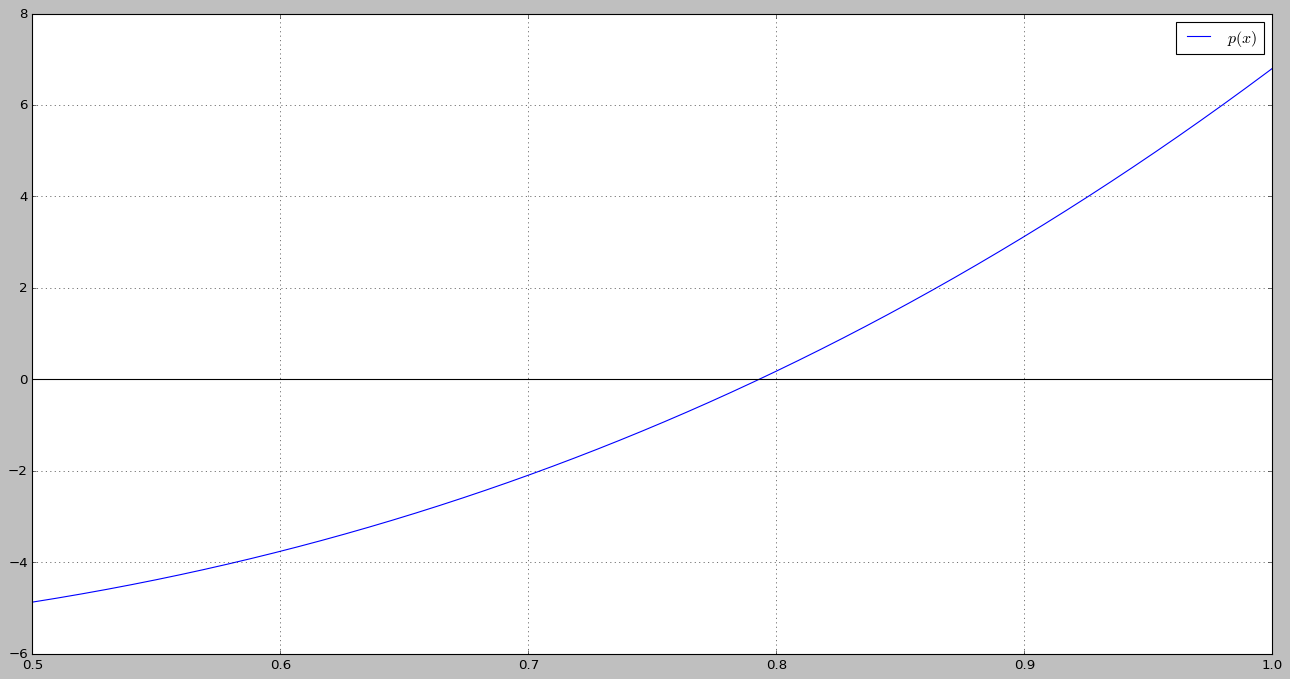

In [109]:
x = np.linspace(0.5, 1, 1000)
fig, axs = plt.subplots(1, figsize=(20, 10))
plt.style.use("classic")

axs.plot(x, p(x), label='$p(x)$', color = "blue")
axs.plot(x, 0*x, color = "black")

axs.xaxis.set_minor_locator(ML(0.1))

axs.grid()
axs.legend()
plt.show()

In [110]:
interval3 = (0.5, 1)
root3 = newton_method(p, dp, sum(interval3) / 2)
print(root3)

(0.793112433262025, 3)


### Корни:
$x_{1}= -1.4376535919539615$ и его кратность 1.

$x_{2}= -0.375867004444322$ и его кратность 1.

$x_{3}= 0.793112433262025$ и его кратность 1.